<a href="https://colab.research.google.com/github/farhnsaptr/DIF62130_B_25_2311532018/blob/main/Praktikum5/DimensityReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris['data']
y = iris['target']

n_column, n_features = X.shape

X.shape


(150, 4)

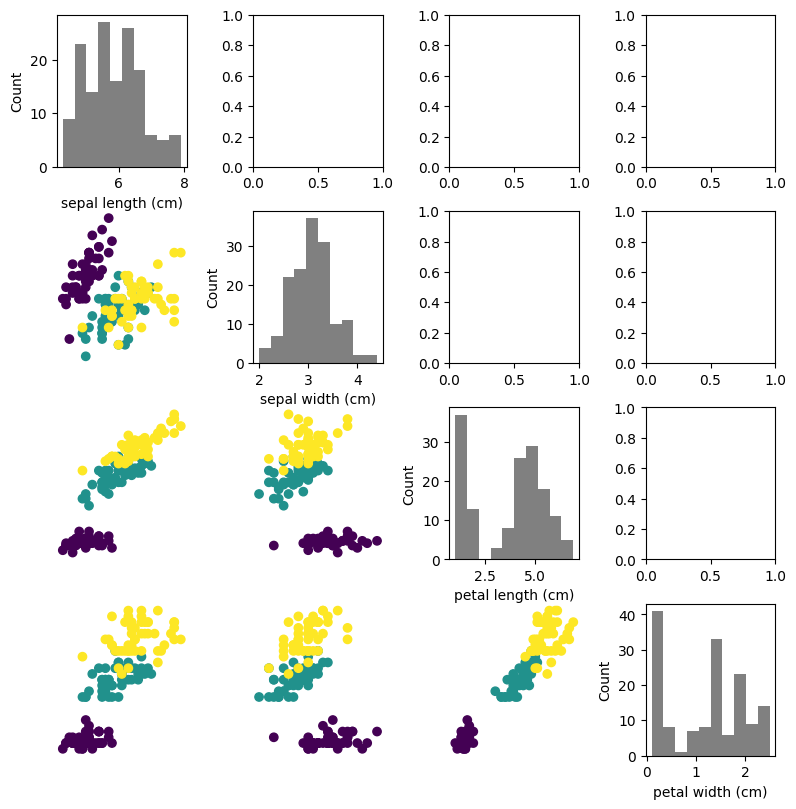

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(nrows=n_features, ncols=n_features, figsize=(8,8))
fig.tight_layout()

names = iris.feature_names

for i, j, in zip(*np.triu_indices_from(ax, k=1)):
    ax[j, i].scatter(X[:, i], X[:, j], c=y)
    ax[j, i].set_xlabel(names[j])
    ax[j, i].set_ylabel(names[i])
    ax[j, i].set_axis_off()

for i in range(n_features):
    ax[i, i].hist(X[:, i], color='gray')
    ax[i, i].set_ylabel('Count')
    ax[i, i].set_xlabel(names[i])


In [5]:
def mean(a):
  return sum(a)/len(a)

def std(b):
  return (sum((i - mean(b))**2 for i in b)/len(b))**0.5

def Standardize_data(c):
  return (c - mean(c))/std(c)


X_std = Standardize_data(X)
print(X_std)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

In [7]:
def covariance(x):
  return (x.T @ x)/(x.shape[0]-1)

cov_mat = covariance(X_std)
print(cov_mat)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [10]:
# prompt: hitung eigenvectors dan eigenvalues dari covariance matrix yang telah dibuat menggunakan numpy.linalg import eig

from numpy.linalg import eig

eig_vals, eig_vecs = eig(cov_mat)

max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
eig_vecs = eig_vecs * signs[np.newaxis, :]

print(eig_vecs)
print(eig_vals)



[[ 0.52106591  0.37741762  0.71956635 -0.26128628]
 [-0.26934744  0.92329566 -0.24438178  0.12350962]
 [ 0.5804131   0.02449161 -0.14212637  0.80144925]
 [ 0.56485654  0.06694199 -0.63427274 -0.52359713]]
[2.93808505 0.9201649  0.14774182 0.02085386]


In [11]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]

eig_pairs.sort(key=lambda x: x[0], reverse=True)

eig_vals_sorted = np.array([x[0] for x in eig_pairs])
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

print(eig_pairs)

[(np.float64(2.9380850501999918), array([ 0.52106591,  0.37741762,  0.71956635, -0.26128628])), (np.float64(0.920164904162487), array([-0.26934744,  0.92329566, -0.24438178,  0.12350962])), (np.float64(0.14774182104494785), array([ 0.5804131 ,  0.02449161, -0.14212637,  0.80144925])), (np.float64(0.020853862176462023), array([ 0.56485654,  0.06694199, -0.63427274, -0.52359713]))]


In [12]:
k = 2
W = eig_vecs_sorted[:k, :]

print(W.shape)

(2, 4)


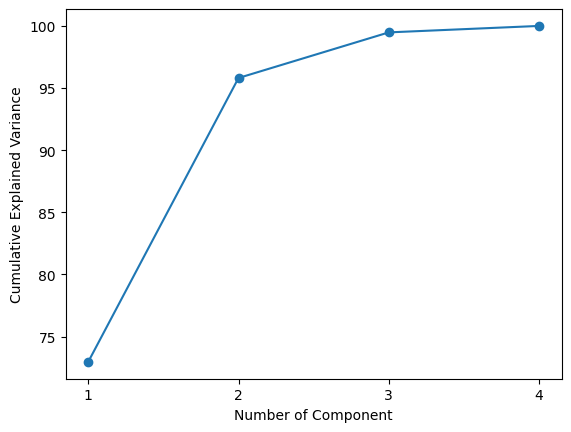

In [13]:
eig_vals_total = sum(eig_vals)

explained_variance = [(i / eig_vals_total)*100 for i in eig_vals_sorted]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)

plt.plot(np.arange(1, n_features + 1), cum_explained_variance, '-o')
plt.xticks(np.arange(1, n_features + 1))
plt.xlabel('Number of Component')
plt.ylabel('Cumulative Explained Variance');
plt.show()


In [14]:
X_proj = X_std.dot(W.T)
print(X_proj.shape)
print(X.shape)

(150, 2)
(150, 4)


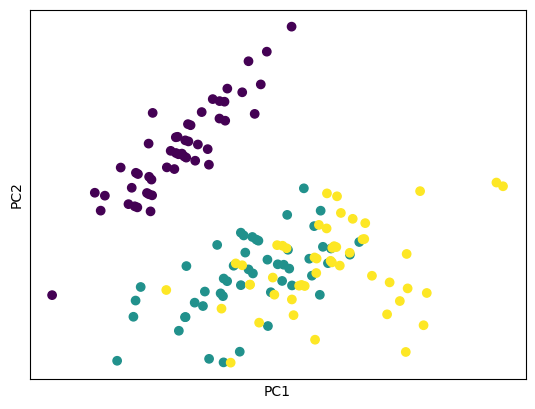

In [17]:
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=y)
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.show()